<a href="https://colab.research.google.com/github/rishikahakeem/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Load the dataset
car_data = pd.read_csv('/content/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Feature Engineering
car_data['Car_Age'] = 2024 - car_data['Year']  # Assuming the current year is 2024
car_data = car_data.drop(['Car_Name', 'Year'], axis=1)  # Drop non-numeric or redundant features

In [ ]:
# Define features and target variable
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']


In [ ]:
#  Preprocessing - Encoding categorical features and scaling
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
# Fit and transform the data
X = preprocessor.fit_transform(X)

In [ ]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the Deep Learning Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for regression
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Train the Model
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 45.8644 - mae: 4.2821 - val_loss: 47.5042 - val_mae: 5.1343
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.7312 - mae: 4.3670 - val_loss: 45.0031 - val_mae: 4.9231
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 36.4812 - mae: 3.9660 - val_loss: 42.5949 - val_mae: 4.7617
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 42.4285 - mae: 4.1983 - val_loss: 40.1854 - val_mae: 4.6632
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 39.9954 - mae: 3.8600 - val_loss: 37.7518 - val_mae: 4.5642
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 45.9292 - mae: 4.2293 - val_loss: 35.0128 - val_mae: 4.4506
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 26.8068 - mae: 3.4640 - val_loss: 32.3747 - val_mae: 4.3435
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 26.8361 - mae: 3.4171 - val_loss: 29.4955 - val_mae: 4.2037
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss

In [ ]:
#Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error on test data:", mae)


Mean Absolute Error on test data: 1.1278307437896729


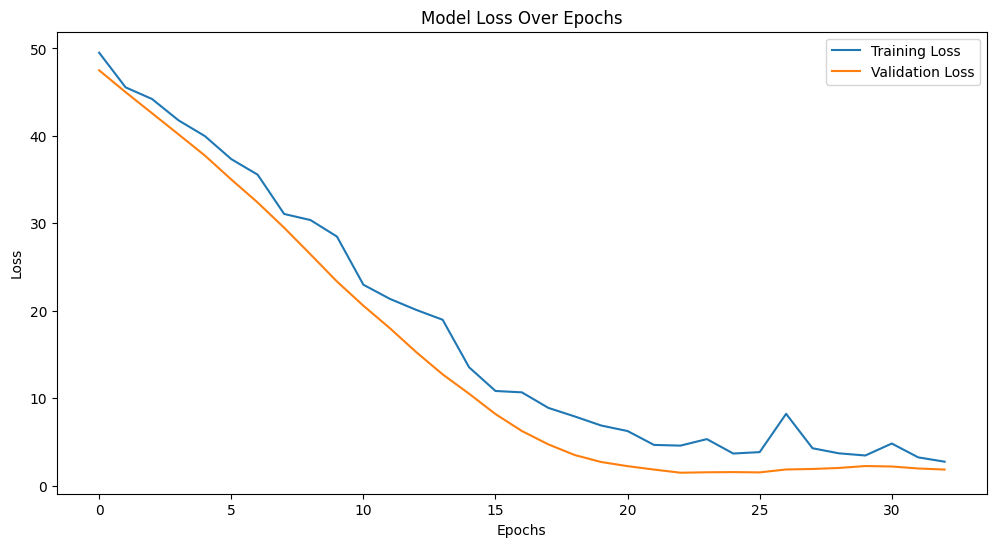

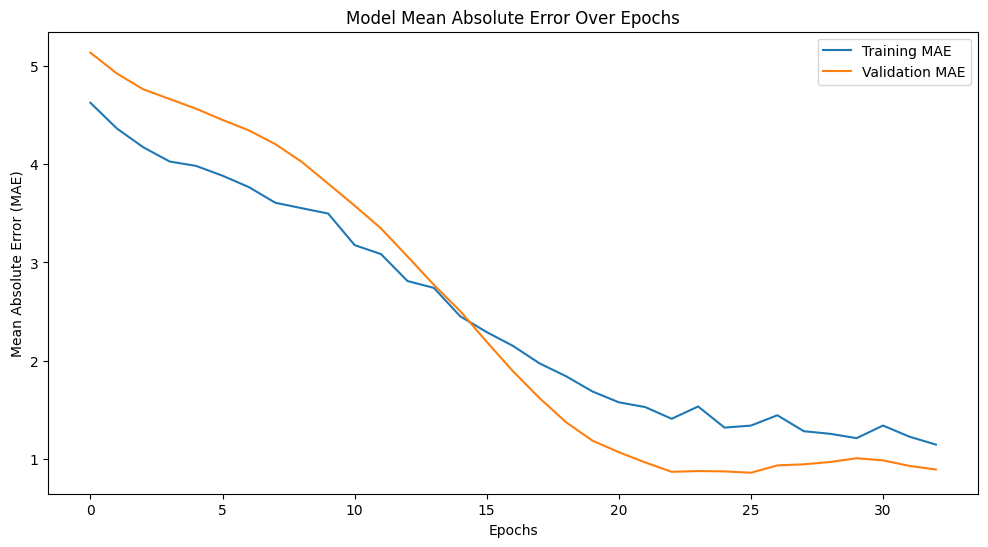

In [ ]:
# Optional: Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Model Mean Absolute Error Over Epochs')
plt.show()